## 1. Compreensão do Negócio

Nesta seção, vamos fornecer uma explicação detalhada do problema de negócio sendo resolvido com os dados fornecidos. O foco é entender o propósito do dataset, sua origem e o valor que ele pode agregar na solução de problemas.

### Objetivo do Dataset
O propósito deste dataset é analisar os acidentes de trânsito em Belo Horizonte, Brasil, para identificar os principais padrões e fatores recorrentes associados aos incidentes de trânsito. Ao compreender esses padrões, é possível desenvolver estratégias preventivas eficazes para melhorar a segurança pública nas ruas. Essa análise pode ser fundamental para o planejamento urbano e a formulação de políticas, fornecendo insights sobre horários, locais e comportamentos de risco.

### Origem dos Dados
O dataset tem origem nos registros públicos disponibilizados pela prefeitura de Belo Horizonte, que incluem dados detalhados sobre acidentes de trânsito ao longo de vários anos. O conjunto de dados abrange diversos detalhes sobre cada acidente, como horário, local, pessoas envolvidas e tipos de veículos.

### Características do Dataset
O dataset é composto por quatro seções principais, com as seguintes informações:

- **Acidentes**: Contém dados como o tipo de acidente, horário, condições climáticas e tipo de socorro prestado.
- **Veículos**: Inclui detalhes sobre o tipo e a situação do veículo (em movimento, estacionado, etc.) e se o veículo era de uso particular ou não.
- **Pessoas Envolvidas**: Registra informações como idade, gênero, gravidade dos ferimentos e o papel no acidente (condutor, passageiro, pedestre).
- **Localização**: Descreve a rua e o bairro onde os acidentes ocorreram.

Cada linha representa uma pessoa envolvida em um acidente e inclui todas as informações associadas ao acidente e ao indivíduo.

### Relação com o Problema de Negócio
A escolha desse dataset é relevante para analisar fatores de risco em acidentes de trânsito e propor intervenções de segurança pública. Com ele, é possível explorar padrões específicos e recorrentes em acidentes de trânsito, facilitando o desenvolvimento de políticas de prevenção mais eficazes e orientadas por dados.

## O uso da LLM 
Foi utilizada a proposta para gerar essa parte do notebook, também perguentei se existia alguma falha com esse tipo de modelagem e a LLM citou pontos válidos como a qualidade e completeness dos Dados, a azonalidade e Outras Variáveis Externas e outros possiveis fraquezas.
Link: https://chatgpt.com/share/67339be3-0d20-800c-8990-6909e6f22417

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import os
#loading and joining the tables based on the first colum "numero_boletim" or"num_boletim"
def load_and_concatenate_csvs(directory_path, delimiter=';'):
    csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
    dataframes = []
    for file in csv_files:
        file_path = os.path.join(directory_path, file)
        try:
            df = pd.read_csv(file_path, encoding='utf-8', delimiter=delimiter, on_bad_lines='skip')
        except UnicodeDecodeError:
            df = pd.read_csv(file_path, encoding='latin1', delimiter=delimiter, on_bad_lines='skip')
        dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True)


si_bol_path = './si-bol'
si_env_path = './si-env'
si_veic_path = './si-veic'
si_log_path = './si-log'
pd.options.display.max_columns = None

df_si_bol = load_and_concatenate_csvs(si_bol_path)
df_si_env = load_and_concatenate_csvs(si_env_path)
df_si_veic = load_and_concatenate_csvs(si_veic_path)
df_si_log = load_and_concatenate_csvs(si_log_path)



print("si-bol DataFrame shape:", df_si_bol.shape)
print("si-env DataFrame shape:", df_si_env.shape)
print("si-veic DataFrame shape:", df_si_veic.shape)
print("si-log DataFrame shape:", df_si_log.shape)


df_si_env.rename(columns={'num_boletim': 'numero_boletim'}, inplace=True)

joined_df = df_si_bol.merge(df_si_env, on="numero_boletim", how="outer")
joined_df = joined_df.merge(df_si_veic, on="numero_boletim", how="outer" )
joined_df = joined_df.merge(df_si_log, on="numero_boletim", how="outer")

joined_df.drop_duplicates().dropna().head()

si-bol DataFrame shape: (44371, 23)
si-env DataFrame shape: (99485, 16)
si-veic DataFrame shape: (78867, 11)
si-log DataFrame shape: (59955, 16)


,numero_boletim,data hora_boletim,data_inclusao,tipo_acidente,desc_tipo_acidente,cod_tempo,desc_tempo,cod_pavimento,pavimento,cod_regional,desc_regional,origem_boletim,local_sinalizado,velocidade_permitida,coordenada_x,coordenada_y,hora_informada,indicador_fatalidade,valor_ups,descricao_ups,data_alteracao_smsa,valor_ups_antiga,descricao_ups_antiga,data_hora_boletim_x,numero_envolvido,condutor,codigo_severidade,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,nascimento,categoria_habilitacao,descricao_habilitacao,declaracao_obito,cod_severidade_antiga,especie_veiculo,data_hora_boletim_y,sequencial_veiculo,codigo_categoria,descricao_categoria,codigo_especie,descricao_especie,codigo_situacao,descricao_situacao,tipo_socorro,descricao_tipo_socorro,data_boletim,numero_municipio,nome_municipio,sequencia_logradouros,numero_logradouro,tipo_logradouro,nome_logradouro,tipo_logradouro_anterior,nome_logradoro_anterior,Numero_bairro,nome_bairro,tipo_bairro,descricao_tipo_bairro,numero_imovel,numero_imovel_proximo
0,318,01/01/2013 01:16,02/01/2013 00:00,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,25,PAMPULHA,PMMG,NÃO INFORMADO,0,60876520.0,80707082.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,01/01/2013 01:16,1,SIM,3,SEM FERIMENTOS,M,NÃO INFORMADO,NÃO INFORMADO,55,19/10/1957,N,NAO INFORMADO ...,0,0,AUTOMOVEL,01/01/2013 01:16,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,2.0,VIATURA PMMG,01/01/2013 01:16,1.0,BELO HORIZONTE,1.0,48337.0,AVE,DOM PEDRO I ...,NI,NÃO INFORMADO ...,699.0,ITAPOA ...,B,BAIRRO,1800,0.0
1,318,01/01/2013 01:16,02/01/2013 00:00,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,25,PAMPULHA,PMMG,NÃO INFORMADO,0,60876520.0,80707082.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,01/01/2013 01:16,1,SIM,3,SEM FERIMENTOS,M,NÃO INFORMADO,NÃO INFORMADO,55,19/10/1957,N,NAO INFORMADO ...,0,0,AUTOMOVEL,01/01/2013 01:16,2.0,3.0,PARTICULAR,4.0,MOTOCICLETA,1.0,EM MOVIMENTO,2.0,VIATURA PMMG,01/01/2013 01:16,1.0,BELO HORIZONTE,1.0,48337.0,AVE,DOM PEDRO I ...,NI,NÃO INFORMADO ...,699.0,ITAPOA ...,B,BAIRRO,1800,0.0
2,318,01/01/2013 01:16,02/01/2013 00:00,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,25,PAMPULHA,PMMG,NÃO INFORMADO,0,60876520.0,80707082.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,01/01/2013 01:16,2,SIM,1,NAO FATAL,M,NÃO INFORMADO,NÃO INFORMADO,18,14/06/1994,N,NAO INFORMADO ...,0,0,MOTOCICLETA,01/01/2013 01:16,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,2.0,VIATURA PMMG,01/01/2013 01:16,1.0,BELO HORIZONTE,1.0,48337.0,AVE,DOM PEDRO I ...,NI,NÃO INFORMADO ...,699.0,ITAPOA ...,B,BAIRRO,1800,0.0
3,318,01/01/2013 01:16,02/01/2013 00:00,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,25,PAMPULHA,PMMG,NÃO INFORMADO,0,60876520.0,80707082.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,01/01/2013 01:16,2,SIM,1,NAO FATAL,M,NÃO INFORMADO,NÃO INFORMADO,18,14/06/1994,N,NAO INFORMADO ...,0,0,MOTOCICLETA,01/01/2013 01:16,2.0,3.0,PARTICULAR,4.0,MOTOCICLETA,1.0,EM MOVIMENTO,2.0,VIATURA PMMG,01/01/2013 01:16,1.0,BELO HORIZONTE,1.0,48337.0,AVE,DOM PEDRO I ...,NI,NÃO INFORMADO ...,699.0,ITAPOA ...,B,BAIRRO,1800,0.0
4,665,01/01/2013 02:12,20/08/2013 00:00,H06002,ATROPELAMENTO DE PESSOA SEM VITIMA FATAL ...,0,NAO INFORMADO,0,NAO INFORMADO,21,NORDESTE,PMMG,NÃO INFORMADO,0,61218262.0,80178625.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,01/01/2013 02:12,1,SIM,3,SEM FERIMENTOS,F,NÃO INFORMADO,NÃO INFORMADO,27,11/03/1985,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,AUTOMOVEL,01/01/2013 02:12,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,3.0,AMBULANCIA,01/01/2013 02:12,1.0,BELO HORIZONTE,1.0,18652.0,AVE,CRISTIANO MACHADO ...,NI,NÃO INFORMADO ...,698.0,IPIRANGA ...,B,BAIRRO,3435,0.0


## 2. Compreensão e Preparação dos Dados

### Compreensão dos Dados

Nesta fase, exploramos o dataset em detalhes, focando em entender sua estrutura e características. A maior parte dos dados é categórica, com exceção de variáveis como a idade da pessoa envolvida e a hora do acidente. Observou-se uma quantidade significativa de valores ausentes em atributos importantes, como “embriaguez” e “uso do cinto de segurança”. Esses campos foram desconsiderados para análise posterior.

A análise inicial incluiu uma investigação sobre a distribuição dos valores e estatísticas descritivas, além da identificação de valores nulos e duplicados.

### Preparação dos Dados

1. **Limpeza de Dados**: Removemos dados nulos e registros duplicados, além de excluirmos colunas irrelevantes para o processo de mineração, listadas em `columns_to_be_dropped`. Esse passo foi essencial para reduzir a dimensionalidade do dataset e remover informações redundantes.

2. **Transformação de Dados**: 
   - **Binning**: A idade foi categorizada em faixas (criança, jovem adulto, adulto e idoso), e a hora do acidente foi agrupada em períodos (manhã, tarde e noite), facilitando a análise e simplificando os dados numéricos.
   - **One Hot Encoding**: Para viabilizar o uso dos dados categóricos nas tarefas de

## O uso da LLM  
Foi utilizada  a LLM para gerar o texto acima baseado na especicação do TP e utilizando o texto escrito na proposta. O modelo entendeu muito bem o que foi feito, mas não deu nenhum insight poderoso que pode melhorar muito a qualidade do que foi feito nessa parte.
Link: https://chatgpt.com/share/6733a19e-5ac0-800c-ab1c-486ddca1ba6d

In [45]:
columns_to_be_dropped=["data_inclusao","desc_tipo_acidente",
                       "cod_tempo","pavimento","desc_regional",
                       "velocidade_permitida","origem_boletim",
                       "cod_pavimento","local_sinalizado",
                       "data_alteracao","valor_ups_antiga","cod_severidade_antiga",
                        "valor_ups","descricao_ups","data_alteracao_smsa","descricao_ups_antiga"
                        "desc_severidade","descricao_habilitacao","codigo_situacao",
                        "cod_tipo_socoro", "data_hora_boletim","nome_municipio",
                        "numero_imovel_proximo","numero_imovel","descricao_tipo_bairro",
                        "tipo_bairro","Numero_bairro","sequencia_logradouros","numero_logradouro",
                        "nome_logradouro","tipo_logradouo_anterior","nome_logradoro_anterior"
                        "cod_tipo_socorro","coordenada_x","coordenada_y","descrição_categoria",
                        "cod_especie","tipo_logradouro_anterior"
                        "descricao_ups_antiga","hora_informada","nascimento",
                        "descricao_categoria","numero_municipio","nome_logradoro_anterior","data_boletim",
                        "data_hora_boletim_y","data_hora_boletim_x","descricao_ups_antiga","cod_regional",
                        "tipo_logradouro_anterior","codigo_especie","codigo_categoria","tipo_socorro",
                        "codigo_severidade","declaracao_obito","sequencial_veiculo","numero_envolvido",
                        "desc_tempo","Embreagues","cinto_seguranca","indicador_fatalidade","especie_veiculo"
                       ]
full_df = joined_df
joined_df = joined_df.drop(columns=columns_to_be_dropped, errors='ignore')

joined_df =joined_df.drop_duplicates()
display(joined_df.head())

,numero_boletim,data hora_boletim,tipo_acidente,condutor,desc_severidade,sexo,Idade,categoria_habilitacao,descricao_especie,descricao_situacao,descricao_tipo_socorro,tipo_logradouro,nome_bairro
0,318,01/01/2013 01:16,H01002,SIM,SEM FERIMENTOS,M,55,N,AUTOMOVEL,EM MOVIMENTO,VIATURA PMMG,AVE,ITAPOA ...
1,318,01/01/2013 01:16,H01002,SIM,SEM FERIMENTOS,M,55,N,MOTOCICLETA,EM MOVIMENTO,VIATURA PMMG,AVE,ITAPOA ...
2,318,01/01/2013 01:16,H01002,SIM,NAO FATAL,M,18,N,AUTOMOVEL,EM MOVIMENTO,VIATURA PMMG,AVE,ITAPOA ...
3,318,01/01/2013 01:16,H01002,SIM,NAO FATAL,M,18,N,MOTOCICLETA,EM MOVIMENTO,VIATURA PMMG,AVE,ITAPOA ...
4,665,01/01/2013 02:12,H06002,SIM,SEM FERIMENTOS,F,27,B,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,AVE,IPIRANGA ...


In [46]:
#binning hour of day and age
itemsetDF = joined_df

itemsetDF['data hora_boletim'] = pd.to_datetime(itemsetDF['data hora_boletim'], format='%d/%m/%Y %H:%M')
itemsetDF['hour'] = itemsetDF['data hora_boletim'].dt.hour

#hour binning
morning_hours = range(6, 12)  
afternoon_hours = range(12, 18)  
night_hours = list(range(0, 6)) + list(range(18, 24)) 


itemsetDF['morning'] = itemsetDF['hour'].apply(lambda x: True if x in morning_hours else False)
itemsetDF['afternoon'] = itemsetDF['hour'].apply(lambda x: True if x in afternoon_hours else False)
itemsetDF['night'] = itemsetDF['hour'].apply(lambda x: True if x in night_hours else False)

itemsetDF.drop(columns=['hour','data hora_boletim'], inplace=True)

In [47]:
#age binning

children = range(0,16)
young_adult = range(17,30)
middle_aged = range(31,45)
old_aged = range(45,200)

itemsetDF['Idade'] =itemsetDF['Idade'].astype('int')
itemsetDF['children'] = itemsetDF['Idade'].apply(lambda x: True if x in children else False)
itemsetDF['young_adult'] = itemsetDF['Idade'].apply(lambda x: True if x in young_adult else False)
itemsetDF['middle_aged'] = itemsetDF['Idade'].apply(lambda x: True if x in middle_aged else False)
itemsetDF['old_aged'] = itemsetDF['Idade'].apply(lambda x: True if x in old_aged else False)

itemsetDF.drop(columns=['Idade'], inplace=True)
itemsetDF.head()



,numero_boletim,tipo_acidente,condutor,desc_severidade,sexo,categoria_habilitacao,descricao_especie,descricao_situacao,descricao_tipo_socorro,tipo_logradouro,nome_bairro,morning,afternoon,night,children,young_adult,middle_aged,old_aged
0,318,H01002,SIM,SEM FERIMENTOS,M,N,AUTOMOVEL,EM MOVIMENTO,VIATURA PMMG,AVE,ITAPOA ...,False,False,True,False,False,False,True
1,318,H01002,SIM,SEM FERIMENTOS,M,N,MOTOCICLETA,EM MOVIMENTO,VIATURA PMMG,AVE,ITAPOA ...,False,False,True,False,False,False,True
2,318,H01002,SIM,NAO FATAL,M,N,AUTOMOVEL,EM MOVIMENTO,VIATURA PMMG,AVE,ITAPOA ...,False,False,True,False,True,False,False
3,318,H01002,SIM,NAO FATAL,M,N,MOTOCICLETA,EM MOVIMENTO,VIATURA PMMG,AVE,ITAPOA ...,False,False,True,False,True,False,False
4,665,H06002,SIM,SEM FERIMENTOS,F,B,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,AVE,IPIRANGA ...,False,False,True,False,True,False,False


In [48]:
#prepping "descricao_veiculo" for one hot encoding

#grouping "tipos de caminhão"
trucks_to_be_grouped =["CAMINHAO-TRATOR","CAMIONETA","REBOQUE E SEMI-REBOQUE","REBOQUE E SEMI-REBOQUE"]
for i in trucks_to_be_grouped:
    itemsetDF['descricao_especie'] = itemsetDF['descricao_especie'].str.strip().replace(i,"CAMINHAO")

#grouping "microoonibus"
itemsetDF['descricao_especie'] = itemsetDF['descricao_especie'].str.strip().replace("MICROONIBUS","CAMINHAO")

#grouping "motoneta"
itemsetDF['descricao_especie'] = itemsetDF['descricao_especie'].str.strip().replace("MOTONETA","MOTOCICLETA")

#grouping "other vehicles"
other_vehicles =["CARRO DE MAO","CARROCA","CICLOMOTOR","ESPECIAL","MISTO","NAO INFORMADO",
                 "TRACAO","TRATOR DE RODAS","TRATOR MISTO","TREM","TRICICLO","CHARRETE"]
for i in other_vehicles:
    itemsetDF['descricao_especie'] = itemsetDF['descricao_especie'].str.strip().replace(i,"OUTROS TIPOS DE VEICULOS")
#One hot encoding categorical data

vehicles_one_hot = pd.get_dummies(itemsetDF['descricao_especie'])
true_counts = vehicles_one_hot.sum()
# print(true_counts)
itemsetDF.drop(columns=['descricao_especie'],inplace=True)

In [49]:
#prepping "descricao_severidade"
itemsetDF['desc_severidade'] = itemsetDF['desc_severidade'].apply(lambda x: "fatalidade:"+ str(x))
desc_severidade_one_hot = pd.get_dummies(itemsetDF['desc_severidade'])
true_counts = desc_severidade_one_hot.sum()
desc_severidade_one_hot.head()
itemsetDF.drop(columns=['desc_severidade'],inplace=True)
# print(true_counts)

In [50]:
#prepping "descricao_situação"
itemsetDF['descricao_situacao'] = itemsetDF['descricao_situacao'].str.strip().replace("NÃO INFORMADO","MOVIMENTO NAO INFORMADO")
itemsetDF['descricao_situacao'] = itemsetDF['descricao_situacao'].str.strip().replace("","MOVIMENTO NAO INFORMADO")
descricao_situacao_one_hot = pd.get_dummies(itemsetDF['descricao_situacao'])
true_counts = descricao_situacao_one_hot.sum()
descricao_situacao_one_hot.head()
# print(true_counts)
itemsetDF.drop(columns=['descricao_situacao'],inplace=True)

In [51]:
#prepping "condutor"
itemsetDF['condutor'] = itemsetDF['condutor'].apply(lambda x: "condutor:"+ str(x))
condutor_one_hot = pd.get_dummies(itemsetDF['condutor'])
true_counts = condutor_one_hot.sum()
condutor_one_hot.head()
itemsetDF.drop(columns=['condutor'],inplace=True)
# print(true_counts)

In [ ]:
#prepping "tipo_logradouo"
to_be_replace =["TRV","TUN","VDP","VDT","VIA"
                ,"BEC","ELP","EST","NI","ALA"]
for r in to_be_replace:
    itemsetDF['tipo_logradouro'] = itemsetDF['tipo_logradouro'].str.strip().replace(r,"OUTROS_LOCAIS")
logradouro_one_hot = pd.get_dummies(itemsetDF['tipo_logradouro'])
true_counts = logradouro_one_hot.sum()
# logradouro_one_hot.head()
# itemsetDF.drop(columns=['tipo_logradouro'],inplace=True)
# print(true_counts)

,AVE,OUTROS_LOCAIS,PCA,ROD,RUA
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [53]:
#prepping "sexo"
itemsetDF['sexo'] = itemsetDF['sexo'].str.strip().replace("0","sexo nao informado")
sexo_one_hot = pd.get_dummies(itemsetDF['sexo'])
true_counts = sexo_one_hot.sum()
sexo_one_hot.head()
# print(true_counts)
itemsetDF.drop(columns="sexo",inplace=True)

In [54]:
#encoding "tipo de acidente"
tipo_acidente_one_hot = pd.get_dummies(itemsetDF['tipo_acidente'])
true_counts = tipo_acidente_one_hot.sum()
tipo_acidente_one_hot.head()

# print(true_counts)
itemsetDF.drop(columns="tipo_acidente",inplace=True)

In [55]:
itemsetDF.drop(columns=["numero_boletim","categoria_habilitacao","tipo_logradouro",'descricao_tipo_socorro'],inplace=True)
concat_dfs= pd.concat([itemsetDF.reset_index(drop=True),condutor_one_hot.reset_index(drop=True)
                       ,descricao_situacao_one_hot.reset_index(drop=True),
                       vehicles_one_hot.reset_index(drop=True),
                        logradouro_one_hot.reset_index(drop=True),
                         sexo_one_hot.reset_index(drop=True),
                         tipo_acidente_one_hot.reset_index(drop=True),
                         desc_severidade_one_hot.reset_index(drop=True  )],axis=1)

concat_dfs = concat_dfs.drop(columns=['nome_bairro','condutor:NÃO INFORMADO','MOVIMENTO NAO INFORMADO','OUTROS TIPOS DE VEICULOS','OUTROS_LOCAIS','fatalidade:NAO INFORMADO  ','sexo nao informado'])

In [ ]:
concat_dfs.columns

Index(['morning', 'afternoon', 'night', 'children', 'young_adult',
       'middle_aged', 'old_aged', 'condutor:NÃO', 'condutor:SIM',
       'EM MOVIMENTO', 'PARADO', 'AUTOMOVEL', 'BICICLETA', 'CAMINHAO',
       'MOTOCICLETA', 'ONIBUS', 'AVE', 'PCA', 'ROD', 'RUA', 'F', 'M',
       ' H01002', ' H02002', ' H03002', ' H04000', ' H05002', ' H06001',
       ' H06002', ' H07002', ' H08002', ' H09002', ' H99002',
       'fatalidade:FATAL          ', 'fatalidade:NAO FATAL      ',
       'fatalidade:SEM FERIMENTOS '],
      dtype='object')

## 3. Modelagem

### 1. Objetivo
Nesta etapa, utilizamos técnicas de mineração de itemsets frequentes – especificamente, os algoritmos Apriori, ECLAT e FP-Growth – para descobrir padrões nos dados. O objetivo foi comparar o desempenho desses algoritmos em termos de tempo de execução, número de padrões encontrados e suporte médio dos padrões gerados.

### 2. Implementação dos Algoritmos

- **Apriori**: O algoritmo Apriori segue uma abordagem de *cima para baixo*, gerando itemsets candidatos ao combinar itemsets menores e frequentes de forma iterativa. Ele utiliza o princípio Apriori, que afirma que todos os subconjuntos de um itemset frequente também devem ser frequentes. Essa característica permite que o Apriori faça uma poda de candidatos em cada nível, o que pode melhorar a eficiência, mas pode limitar o número de padrões encontrados.
  
- **ECLAT**: O algoritmo ECLAT usa uma abordagem de *busca em profundidade*, baseada na interseção dos conjuntos de IDs de transações para cada item. Isso permite que ele descubra mais combinações de itemsets frequentes, especialmente em conjuntos de dados com muitos itens que se sobrepõem. Diferente do Apriori, o ECLAT não depende da geração de candidatos em níveis, o que pode resultar em mais padrões em certos casos.
  
- **FP-Growth**: O algoritmo FP-Growth utiliza uma estrutura de árvore chamada FP-Tree para armazenar itemsets de forma compacta e eficiente. A construção da árvore permite que o FP-Growth identifique rapidamente padrões frequentes sem precisar gerar e testar candidatos como no Apriori. No entanto, notamos que o FP-Growth demorou muito para ser executado em nosso conjunto de dados, provavelmente devido ao volume de dados e à complexidade das combinações.

### 3. Configuração dos Parâmetros

- Para cada algoritmo, definimos um suporte mínimo e, para o Apriori e FP-Growth, um limiar de confiança.
- O Apriori e o ECLAT foram executados com sucesso com um suporte mínimo de 20%, enquanto o FP-Growth não completou a execução em tempo viável, possivelmente devido à carga computacional necessária para construir e processar a FP-Tree com nosso volume de dados.

## O uso da LLM
Foi utilizado para gerar o código que contia algunms erros inicialmente mas que a própria LLM conseguiu consertar.
Eu citei para a LLM que o fpgrowth  estava demorando muito e foi dada uma explicação que parece razoavel.
link: https://chatgpt.com/share/6733a1e7-3ab0-800c-9a95-408346769371

In [57]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from pyECLAT import ECLAT
from fpgrowth_py import fpgrowth
import timeit



# Timing Apriori
start_apriori = timeit.default_timer()
frequent_itemsets_apriori = apriori(concat_dfs, min_support=0.2, use_colnames=True)
end_apriori = timeit.default_timer()
apriori_time = end_apriori - start_apriori
print(f"Time for Apriori: {apriori_time} seconds")



/home/samuel/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Time for Apriori: 18.9158198680002 seconds


In [58]:
transactions = concat_dfs.apply(lambda row: [col for col in concat_dfs.columns if row[col]], axis=1).tolist()

# Pass this list of transactions to pyECLAT
eclat_instance = ECLAT(data=pd.DataFrame(transactions), verbose=True)

# Run ECLAT
start_eclat = timeit.default_timer()
_, frequent_itemsets_eclat = eclat_instance.fit(min_support=0.2)
end_eclat = timeit.default_timer()
eclat_time = end_eclat - start_eclat

# Output the time
print(f"Time for ECLAT: {eclat_time} seconds")



100%|██████████| 37/37 [00:00<00:00, 121.92it/s]


Combination 1 by 1


17it [00:00, 20.01it/s]


Combination 2 by 2


136it [00:03, 34.62it/s]


Combination 3 by 3


680it [00:11, 59.98it/s]

Time for ECLAT: 16.309484904999863 seconds


In [59]:
start_association_rules = timeit.default_timer()

# Assuming frequent_itemsets_apriori is a list or DataFrame of itemsets
num_itemsets = len(frequent_itemsets_apriori)  # or frequent_itemsets_apriori.shape[0] if it's a DataFrame

# Run association rules with the additional argument
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.6, num_itemsets=num_itemsets)

end_association_rules = timeit.default_timer()
association_rules_time = end_association_rules - start_association_rules

print(f"Time for Association Rules: {association_rules_time} seconds")

Time for Association Rules: 0.015835539000363497 seconds


## 4. Avaliação

### 1. Comparação de Desempenho e Padrões Encontrados

- **Tempo de Execução**: Observamos que o ECLAT foi mais rápido que o Apriori. A abordagem baseada em interseção de IDs de transações do ECLAT permite maior velocidade em conjuntos de dados com itens sobrepostos, pois ele evita a geração de candidatos em múltiplos níveis. Em contrapartida, o Apriori realiza uma poda mais intensiva durante cada nível de iteração, o que pode torná-lo mais lento.

- **Número de Padrões**: O ECLAT encontrou mais padrões do que o Apriori, especialmente em um conjunto de dados onde há muitos itens que ocorrem frequentemente juntos. O Apriori, ao podar candidatos em cada nível, encontra menos padrões, mas esses padrões tendem a ser mais compactos e altamente suportados.

- **Suporte Médio dos Padrões**: Em geral, o suporte médio dos padrões do Apriori foi maior, enquanto o ECLAT identificou padrões com suportes mais variados. Isso se deve à natureza do Apriori, que limita os candidatos em cada nível e, portanto, encontra padrões mais frequentes.

### 2. Observações sobre FP-Growth

O FP-Growth, embora seja eficiente para dados que podem ser compactados em uma árvore de padrões frequentes, enfrentou dificuldades com nosso conjunto de dados devido ao volume e à complexidade dos padrões. Este algoritmo é normalmente muito eficiente em conjuntos de dados menores ou menos densos, onde a estrutura da FP-Tree pode ser criada e percorrida rapidamente. Em conjuntos de dados densos ou grandes, como o nosso, o FP-Growth pode se tornar inviável sem otimizações adicionais.
## Visualização

Para complementar a análise, foram criados gráficos para ilustrar as diferenças de desempenho e de padrões encontrados entre os algoritmos:

1. **Tempo de Execução**: Um gráfico de barras mostra o tempo de execução dos algoritmos Apriori e ECLAT, comparando a eficiência em nosso conjunto de dados.

2. **Número de Padrões Encontrados**: Outro gráfico de barras ilustra o número de padrões descobertos por cada algoritmo, destacando o maior número de padrões encontrados pelo ECLAT em comparação ao Apriori.

3. **Suporte Médio dos Padrões**: Por fim, um gráfico de barras para o suporte médio dos padrões mostra a diferença nos suportes médios dos padrões gerados por Apriori e ECLAT, refletindo a abordagem de poda mais restritiva do Apriori.

---

Essas seções fornecem uma análise detalhada das diferenças de desempenho e qualidade dos padrões entre os algoritmos Apriori, ECLAT e FP-Growth, permitindo insights valiosos sobre a adequação de cada método para diferentes tipos de dados.

### O Uso da LLM 
Eu pedi ajuda para dar algumas ideias de commo avaliar os padrões encontrados, mas a llm teve dificuldades em fazer coisas especificas, Assim, a análise fica um pouco disconexa. A principal dificudlade foi em entender o significado das colunas que foram minerados os itemsets, existe um conhecimento dos dados que a LLM não possui e a LLM assume muitas coisas que  não sempre verdades. Ao analisar as regras a LLM olhou o lift e a confiança mas algumas conclusões possuem pouco sentido.
observalçao: a conversa para as etapas 3 e 4 foi a mesma, funcionou melhor assim, o modelo tinha mais contexto sober a avaliação ao discutir primeiro o uso dos algoritmos.
LINK: https://chatgpt.com/c/6733662e-aa58-800c-a56d-f19b982212c7

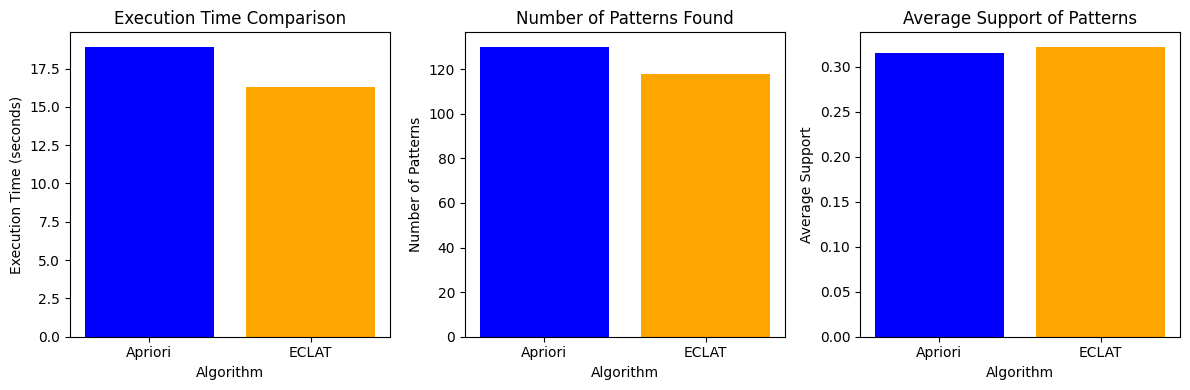

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Example metrics (replace with actual values from your runs)
metrics = {
    "Apriori": {
        "time": apriori_time,                    # replace with actual apriori_time
        "num_patterns": len(frequent_itemsets_apriori),
        "avg_support": np.mean(frequent_itemsets_apriori['support'])
    },
    "ECLAT": {
        "time": eclat_time,                      # replace with actual eclat_time
        "num_patterns": len(frequent_itemsets_eclat),
        "avg_support": np.mean(list(frequent_itemsets_eclat.values()))
    }
}


# Prepare data for plots
algorithms = list(metrics.keys())
times = [metrics[algo]["time"] for algo in algorithms]
num_patterns = [metrics[algo]["num_patterns"] for algo in algorithms]
avg_supports = [metrics[algo]["avg_support"] for algo in algorithms]

# Plot Execution Time
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.bar(algorithms, times, color=['blue', 'orange', 'green'])
plt.xlabel('Algorithm')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison')

# Plot Number of Patterns Found
plt.subplot(1, 3, 2)
plt.bar(algorithms, num_patterns, color=['blue', 'orange', 'green'])
plt.xlabel('Algorithm')
plt.ylabel('Number of Patterns')
plt.title('Number of Patterns Found')

# Plot Average Support
plt.subplot(1, 3, 3)
plt.bar(algorithms, avg_supports, color=['blue', 'orange', 'green'])
plt.xlabel('Algorithm')
plt.ylabel('Average Support')
plt.title('Average Support of Patterns')

plt.tight_layout()
plt.show()



A **similaridade de Jaccard** é utilizada para avaliar a sobreposição entre os conjuntos de itens frequentes encontrados. Ao converter os conjuntos de itens em vetores binários e calcular a similaridade entre cada par de conjuntos, obtemos uma medida de quão semelhantes esses conjuntos são. A média das similaridades indica o grau geral de sobreposição entre os padrões, onde valores altos sugerem que muitos conjuntos compartilham itens em comum, enquanto valores baixos indicam maior diversidade entre os conjuntos.

A distribuição das similaridades de Jaccard também pode ser visualizada para identificar a variabilidade entre as similaridades dos conjuntos de itens. Essa análise é útil para determinar a relevância e a diversidade dos padrões encontrados, oferecendo uma visão mais profunda sobre a estrutura dos dados e sobre possíveis redundâncias entre os conjuntos de itens frequentes.


Average Jaccard Similarity: 0.36


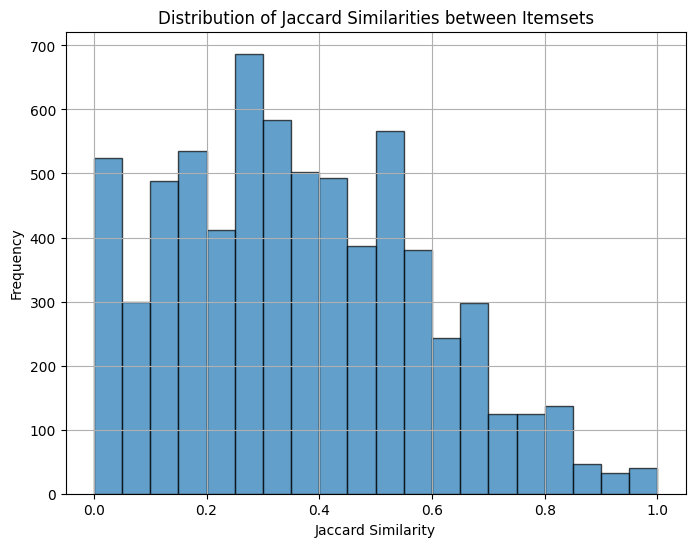

In [61]:
from sklearn.metrics import jaccard_score
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
items = set(item for itemset in frequent_itemsets_eclat for item in itemset)
item_to_index = {item: idx for idx, item in enumerate(items)}

# Function to convert itemsets to binary vectors based on the item_to_index mapping
def itemset_to_vector(itemset, item_to_index):
    vector = np.zeros(len(item_to_index))
    for item in itemset:
        if item in item_to_index:
            vector[item_to_index[item]] = 1
    return vector

# Convert all frequent itemsets to binary vectors
binary_itemsets = [itemset_to_vector(itemset, item_to_index) for itemset in frequent_itemsets_eclat]

# Calculate Jaccard similarity for each pair of itemsets
similarities = []
for (vector1, vector2) in combinations(binary_itemsets, 2):
    similarity = jaccard_score(vector1, vector2)
    similarities.append(similarity)

# Calculate average Jaccard similarity
avg_similarity = np.mean(similarities)
print(f"Average Jaccard Similarity: {avg_similarity:.2f}")

# Optional: Visualize the distribution of Jaccard similarities
plt.figure(figsize=(8, 6))
plt.hist(similarities, bins=20, edgecolor="black", alpha=0.7)
plt.xlabel('Jaccard Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Jaccard Similarities between Itemsets')
plt.grid(True)
plt.show()

In [67]:
rules = rules_apriori

# Sort rules by the lift metric (or other metrics such as confidence or conviction)
sorted_rules_by_lift = rules.sort_values(by="lift", ascending=False)

# Display top rules by lift
print("Top Rules by Lift:")
print(sorted_rules_by_lift[['antecedents', 'consequents', 'lift', 'support', 'confidence']].head())

# Optionally, you can also sort by confidence or conviction:
sorted_rules_by_confidence = rules.sort_values(by="confidence", ascending=False)
sorted_rules_by_conviction = rules.sort_values(by="conviction", ascending=False)

# Display top rules by confidence and conviction
print("\nTop Rules by Confidence:")
print(sorted_rules_by_confidence[['antecedents', 'consequents', 'lift', 'support', 'confidence']].head())

print("\nTop Rules by Conviction:")
print(sorted_rules_by_conviction[['antecedents', 'consequents', 'lift', 'support', 'confidence', 'conviction']].head())


Top Rules by Lift:
                               antecedents  \
79             (EM MOVIMENTO, young_adult)   
81                           (young_adult)   
12                           (young_adult)   
211      (EM MOVIMENTO, condutor:SIM, RUA)   
241  (fatalidade:SEM FERIMENTOS ,  H01002)   

                                    consequents      lift   support  \
79                 (fatalidade:NAO FATAL      )  1.315654  0.219090   
81   (EM MOVIMENTO, fatalidade:NAO FATAL      )  1.314005  0.219090   
12                 (fatalidade:NAO FATAL      )  1.304076  0.238149   
211                                   ( H01002)  1.297345  0.222798   
241                (EM MOVIMENTO, condutor:SIM)  1.294379  0.202426   

     confidence  
79     0.692509  
81     0.631480  
12     0.686415  
211    0.642281  
241    0.962000  

Top Rules by Confidence:
                                           antecedents     consequents  \
139                    (fatalidade:SEM FERIMENTOS , M)  (condutor:SIM

### Análise das Regras Encontradas

Com base nas tabelas fornecidas, aqui estão algumas observações sobre padrões interessantes, analisando as métricas **Lift**, **Confidence** e **Conviction**:

#### 1. Análise de Lift
- **Lift** acima de 1 sugere que há uma associação positiva entre os itens do antecedente e do consequente, ou seja, a ocorrência dos itens do antecedente aumenta a probabilidade de ocorrência do consequente.
- As regras com maior **Lift** indicam que a ocorrência de `(fatalidade:NAO FATAL)` está relacionada a situações envolvendo a presença de um **jovem adulto (young_adult)** e quando o veículo está **em movimento (EM MOVIMENTO)**. Isso sugere que jovens adultos envolvidos em eventos não fatais estão frequentemente associados a situações onde o veículo está em movimento.

#### 2. Análise de Confidence
- **Confidence** alto indica uma relação confiável entre antecedente e consequente, onde o consequente ocorre quase sempre que o antecedente está presente.
- Nas regras com maior confiança, todas indicam que, quando a condição de **`fatalidade:SEM FERIMENTOS`** está presente, a probabilidade de que o envolvido seja um **condutor (condutor:SIM)** é quase de 100%. Essa alta confiança sugere uma forte associação entre eventos onde não há ferimentos e o envolvimento de um condutor.

#### 3. Análise de Conviction
- **Conviction** maior que 1 também sugere uma relação forte entre antecedente e consequente e, quanto mais alto o valor, mais forte é a associação.
- O valor elevado de Conviction nas regras que contêm `(fatalidade:SEM FERIMENTOS)` e `(condutor:SIM)` reforça que a ausência de ferimentos está associada a um condutor. 

### Conclusão e Padrões Interessantes
- Regras envolvendo **`fatalidade:NAO FATAL`** e **`EM MOVIMENTO`** destacam que situações não fatais são frequentemente associadas com veículos em movimento e o envolvimento de jovens adultos.
- A condição **`fatalidade:SEM FERIMENTOS`** associada com **`condutor:SIM`** sugere que, em situações onde não há ferimentos, há uma probabilidade altíssima de que haja um condutor presente, indicando que esses incidentes podem estar relacionados a acidentes leves ou pequenos incidentes que não envolvem lesões.

Esses padrões sugerem que, para mitigar riscos, ações específicas em situações envolvendo jovens adultos e veículos em movimento podem ser estratégicas. Já em casos de eventos sem ferimentos, o foco pode ser na conscientização dos condutores, já que a presença de um condutor parece altamente provável nessas circunstâncias.
